# Naive Bayes

El clasificador se define a partir de una regla bayeasiana como: 

$$P(C|F_1, F_2, \ldots, F_n)$$

Cual es la probabilidad de pertenecer a la clase $C$ dadas mis caracteristicas $\mathbf{F} = \left \{ F_1, F_2, \ldots, F_n \right \}$. Entonces el problema se puede formular, como: 

$$P(C|F_1, F_2, \ldots, F_n) = \frac{P(C) P(\left \{ F_1, F_2, \ldots, F_n \right \}| C)}{P(\left \{ F_1, F_2, \ldots, F_n\right \})}$$

En general calcular $P(\left \{ F_1, F_2, \ldots, F_n\right \})$ es muy dificil y unicamente aporta un indice de normalización. Además $\mathbf{F}$ no  depende de $C$ por lo que se puede obviar. Tendindo en cuenta lo anterior se puede re-escribir como: 

$$P(C, \left \{ F_1, F_2, \ldots, F_n\right \}) = P(C)P(\left \{ F_1, F_2, \ldots, F_n\right \}\mid  C)$$
$$P(C, \left \{ F_1, F_2, \ldots, F_n\right \}) = P(C)P(F_1 \mid C) P(F_2 \mid C, F_1) P(F_3\mid C, F_1, F_2) \ldots$$

La condición **NAIVE** surge cuando se asume independencia condicianal entre las caracteristicas y por lo tanto podemos re-escribir: 

$$P(C, \left \{ F_1, F_2, \ldots, F_n\right \}) = P(C)P(F_1 \mid C) P(F_2 \mid C) P(F_3\mid C) \ldots$$

Es decir que se puede expresar como: 

$$P(C, \left \{ F_1, F_2, \ldots, F_n\right \}) = P(C)\prod_{i=1}^{i=n} P(F_i \mid C)$$

Finalment el modelo de clasificación puede expresarse como: 

$$P(C \mid \left \{ F_1, F_2, \ldots, F_n\right \}) = \frac{1}{Z}P(C)\prod_{i=1}^{i=n} P(F_i \mid C)$$
donde Z es un factor que depende de $\left \{ F_1, F_2, \ldots, F_n\right \}$

# <span style="color:orange"> Student: A jugar.. !! </span>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

%matplotlib inline

In [4]:

df_train=pd.read_csv('../data/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test=pd.read_csv('../data/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Calculating Mean Age for each Passenger Class
df_train.groupby('Pclass', as_index=False)['Age'].mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [11]:
!pip install seaborn

    100% |████████████████████████████████| 204kB 184kB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/user/.cache/pip/wheels/fc/1c/74/c8f80a532c06a789599b8659b117ec7d7574cac4a06f7dabfe
Successfully built seaborn
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


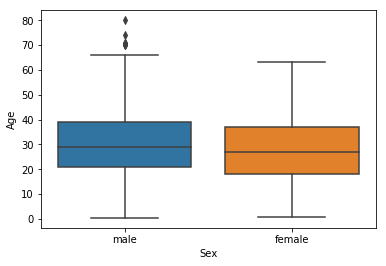

In [14]:
import seaborn as sns
sns.boxplot(x='Sex',y='Age',data=df_train)

References

[1] Titanic dataset: https://www.kaggle.com/kanakroy/titanic-prediction-using-logistic-regression